**CUSTOMER CHURN PREDICTION USING RANDOM FOREST**

Load dataset

In [11]:
from google.colab import files
uploaded = files.upload()


Saving Telco Dataset.csv to Telco Dataset.csv


View top5 rows

In [12]:
import pandas as pd

df = pd.read_csv('Telco Dataset.csv')
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (7011, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1


This ensures there are no missing values in the dataset.

In [13]:
import pandas as pd

# Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Fill missing values — numeric columns with median, categorical with mode
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values after cleaning:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn              

/tmp/ipython-input-1127607899.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/tmp/ipython-input-1127607899.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Machine learning cannot understand words like “Male”, “Female”, “Month-to-Month” — so we convert categories into numbers.

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])   # Yes = 1, No = 0

# Encode remaining categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


Split Data for Training

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (5608, 20)
Test set: (1403, 20)


Train the Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7911617961511048
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1050
           1       0.61      0.49      0.54       353

    accuracy                           0.79      1403
   macro avg       0.72      0.69      0.70      1403
weighted avg       0.78      0.79      0.78      1403



This will show the top reasons why customers leave.

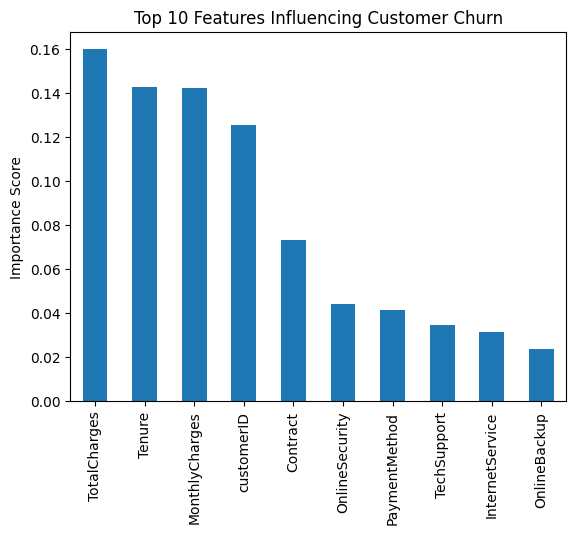

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(10)

top_features.plot(kind='bar')
plt.title("Top 10 Features Influencing Customer Churn")
plt.ylabel("Importance Score")
plt.show()


In [20]:
df.to_csv("clean_telco.csv", index=False)
from google.colab import files
files.download("clean_telco.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>